In [10]:
import math
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model as mdl
from numpy import genfromtxt
import skimage

In [58]:
def CTF( g, lamb, defocus, Cs, C12a, C12b, phi ):
    func = np.sin(np.pi*lamb*(g**2)*(defocus + C12a*np.cos(2*phi) + C12b*np.sin(2*phi) ) 
                  +(0.5*np.pi*Cs*(lamb**3)*(g**4))
                 )**2
    return func

def fit_CTF( ydata, xdata, **kwargs ):
    # kwargs
    kV = kwargs.get('voltage', 200)
    fit_defocus = kwargs.get('fit_defocus', False)
    fit_Cs = kwargs.get('fit_Cs', False)
    kV = kwargs.get('voltage', 200)
    defocus_val = kwargs.get('defocus', 0) * 1e-9
    Cs_val = kwargs.get('Cs', 1.6) *1e-3
    Cs_bounds = kwargs.get('Cs_bounds', [-np.inf, np.inf]) * 1e-3
    defocus_bounds = kwargs.get('defocus_bounds', [-np.inf, np.inf]) * 1e-9
    # convert to SI units
    lamb = kVToLamb( kV )
    #ydata = normaliseDataRange( ydata )
    print( fit_Cs )
    # make model
    model = mdl(CTF)
    params = model.make_params( defocus=defocus_val, Cs=Cs_val, lamb=lamb, C12a=0, C12b=0, phi=0  )
    #print(f'independent variables: {model.independent_vars}')
    params['Cs'].vary = fit_Cs
    params['Cs'].min = Cs_bounds[0]
    params['Cs'].max = Cs_bounds[1]
    params['defocus'].vary = fit_defocus
    params['lamb'].vary = False
    # do fitting
    results = model.fit(ydata, params, g=xdata )
    # report the fit results
    print(results.fit_report(show_correl=False))
    print( 'Cs: ' + str( results.params['Cs'].value * 1e3 ) + ' mm' )
    print( 'Defocus: ' + str( results.params['defocus'].value * 1e9 ) + ' nm' )
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,5)))
    fig, ax  = plt.subplots(1,1)
    #ydata = scaleDataRange( ydata, dmin=0, dmax=1 )
    ax.plot(data[0:,0], data[0:,1], label='full range', linestyle='--')
    ax.plot(xdata/1e9, ydata, label='experimental')
    ax.plot(xdata/1e9, results.best_fit, label='best fit')
    ax.set_box_aspect(1)
    #ax.set_title("Fit")
    fig.legend(loc='lower right')
    fig.tight_layout()
    ax.set_ylabel('Intensity', fontsize = 16)
    ax.set_xlabel('Frequency / nm-1', fontsize = 16)
    #ax.set_ylim([0,1])
    ax.set_xlim([0,4])
    return

def normaliseDataRange( data ):
    return (data-np.min(data))/(np.max(data)-np.min(data))

In [53]:
# import data from file
data = genfromtxt('FEG_CTF.csv', delimiter=',')

False
[[Model]]
    Model(CTF)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12
    # data points      = 150
    # variables        = 4
    chi-square         = 20.3126313
    reduced chi-square = 0.13912761
    Akaike info crit   = -291.908856
    Bayesian info crit = -279.866314
    R-squared          = -9.71275027
##  Warning: uncertainties could not be estimated:
    defocus:  at initial value
[[Variables]]
    lamb:     2.507934e-12 (fixed)
    defocus: -2.2800e-07 (init = -2.28e-07)
    Cs:       0.001278 (fixed)
    C12a:     0.00000000 (init = 0)
    C12b:     0.00000000 (init = 0)
    phi:      0.00000000 (init = 0)
Cs: 1.278 mm
Defocus: -228.0 nm


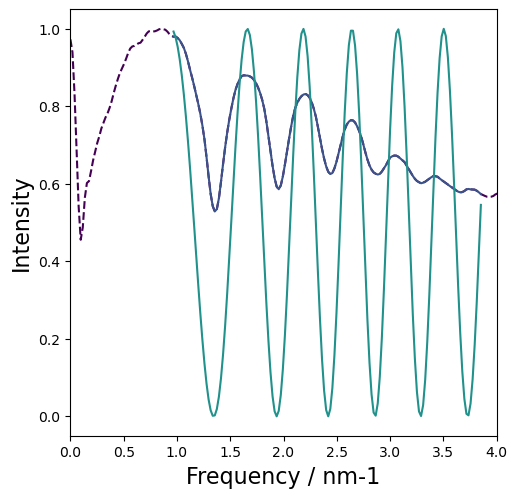

In [54]:
# fitting bounds, lower then upper
# range of data to fit
data_bounds=(50, 200) #0, 350
Cs_bounds = np.array([0.5, 2.0])
defocus_bounds = np.array([-500.0, 0.0])

# define data for fitting and convert frequency from nm-1 to m-1
xdata = data[data_bounds[0]:data_bounds[1],0]*1e9
ydata = data[data_bounds[0]:data_bounds[1],1]

data[0:, 1] = normaliseDataRange( data[0:, 1] )

#Cs in mm, defocus in nm, voltage in kV
fit_CTF( ydata, xdata, fit_defocus=True, fit_Cs=False, voltage=200,
         Cs=1.278, defocus=-228, Cs_bounds=Cs_bounds, defocus_bounds=defocus_bounds )

In [56]:
data = genfromtxt('LaB6_CTF.csv', delimiter=',')

False
[[Model]]
    Model(CTF)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 252
    # data points      = 125
    # variables        = 4
    chi-square         = 12.6790665
    reduced chi-square = 0.10478567
    Akaike info crit   = -278.045176
    Bayesian info crit = -266.731921
    R-squared          = -20.3264192
[[Variables]]
    lamb:     2.507934e-12 (fixed)
    defocus: -2.7044e-07 +/- 0.60059517 (222084712.82%) (init = -2.87e-07)
    Cs:       0.0015 (fixed)
    C12a:    -1.2094e-09 +/- 1.32556012 (109602108429.67%) (init = 0)
    C12b:    -0.01242255 +/- 6726036.88 (54143783274.27%) (init = 0)
    phi:      5.2328e-07 +/- 224.415334 (42886526057.59%) (init = 0)
Cs: 1.5 mm
Defocus: -270.4351698281859 nm


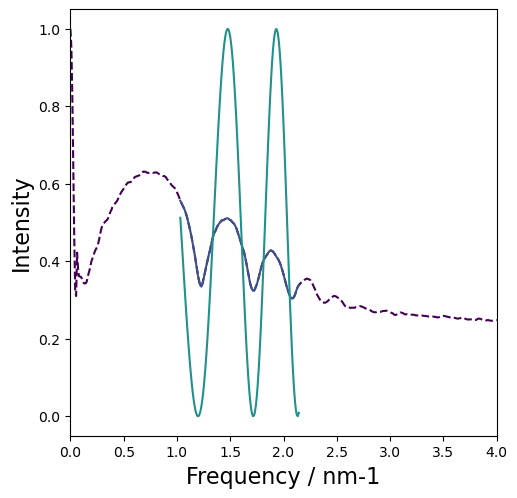

In [57]:
# fitting bounds, lower then upper
# range of data to fit
data_bounds=(115, 240) #0, 350
Cs_bounds = np.array([1.0, 2.0])
defocus_bounds = np.array([-500.0, 0.0])

# define data for fitting and convert frequency from nm-1 to m-1
xdata = data[data_bounds[0]:data_bounds[1],0]*1e9
ydata = data[data_bounds[0]:data_bounds[1],1]

data[0:, 1] = normaliseDataRange( data[0:, 1] )

#xdata = data[0:,0]*1e9
#ydata = data[0:,1]

#Cs in mm, defocus in nm, voltage in kV
fit_CTF( ydata, xdata, fit_defocus=True, fit_Cs=False, voltage=200, Cs=1.5, defocus=-287, Cs_bounds=Cs_bounds, defocus_bounds=defocus_bounds )

In [20]:
def plot2Dfit(data, fit, scale):
    fig, ax = plt.subplots(1, 1)
    # side-by-side plot
    sbs = data
    limit=int(np.size(data,0)/2)
    #sbs[limit:,limit:] = fit[limit:,limit:]
    sbs[limit:,limit:] = fit[limit:,limit:]
    ax.imshow( sbs, cmap='grey',  extent=[-data.shape[1]/2., data.shape[1]/2., -data.shape[0]/2., data.shape[0]/2. ])
    #ax.axvline(0, 0, color='r')
    #ax.axhline(0, 0, color='r')
    ax.set_xticks([])
    ax.set_yticks([])
    from matplotlib import cm
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    fig.colorbar(cm.ScalarMappable(cmap='grey'), cax=cax )
    from mpl_toolkits.axes_grid1.anchored_artists import (AnchoredSizeBar)
    scalebar = AnchoredSizeBar(ax.transData, 1/scale, '1 nm$^{-1}$', loc='lower left', frameon=True, size_vertical=2, borderpad=0.2)
    ax.add_artist(scalebar)
    return

def plot2Dfitalt(data, fit, scale):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    # side-by-side plot
    ax1.imshow( data, cmap='grey')
    ax2.imshow( fit, cmap='grey')
    return

def modelCTF2D( g, phi, lamb, defocus, Cs, C12a, C12b ):
    func = np.sin( (np.pi*lamb*(g**2))*(defocus + C12a*np.sin(2*phi)
                                        + C12b*np.cos(2*phi))  +(0.5*np.pi*Cs*(lamb**3)*(g**4)))**2
    return func

def fit2DCTF( data, scale, **kwargs ):
    # scale in nm-1
    # kwargs
    fit_defocus = kwargs.get('fit_defocus', True)
    fit_Cs = kwargs.get('fit_Cs', False)
    fit_C2astig = kwargs.get('fit_C2', False)
    defocus_val = kwargs.get('defocus', 0) * 1e-9
    Cs_val = kwargs.get('Cs', 1.6) *1e-3
    C21a_val = kwargs.get('C21a', 0.0) *1e-9
    C21b_val = kwargs.get('C21b', 0.0) *1e-9
    defocus_bounds = kwargs.get('defocus_bounds', [-np.inf, np.inf])
    C2astig_bounds = kwargs.get('C21_bounds', [-np.inf, np.inf])
    Cs_bounds = kwargs.get('Cs_bounds', [-np.inf, np.inf])
    # convert to SI units
    data = normaliseDataRange( data )
    # x and y data for fitting function
    imageX = np.size(data,0)
    irow, icol = np.indices(data.shape)
    centX = irow - data.shape[0] / 2.0
    centY = icol - data.shape[1] / 2.0
    iradius = ((centX**2 + centY**2)**0.5) * scale * 1e9
    itheta = np.arctan2(centX, centY)
    # make model and init values
    model2d = mdl( modelCTF2D, independent_vars=['g', 'phi'] )
    params = model2d.make_params()
    params['defocus'].vary = fit_defocus
    params['defocus'].set(value=defocus_val, min=defocus_bounds[0]*1e-9, max=defocus_bounds[1]*1e-9)
    params['lamb'].set(value=0.00251e-9)
    params['lamb'].vary = False
    params['Cs'].vary = fit_Cs
    params['Cs'].set(value=Cs_val, min=Cs_bounds[0]*1e-3, max=Cs_bounds[1]*1e-3)
    params['C12a'].set(value=C21a_val, min=C2astig_bounds[0]*1e-9, max=C2astig_bounds[1]*1e-9)
    params['C12a'].vary = fit_C2astig
    params['C12b'].set(value=C21b_val, min=C2astig_bounds[0]*1e-9, max=C2astig_bounds[1]*1e-9)
    params['C12b'].vary = fit_C2astig
    # do fitting
    results_2d = model2d.fit(data, params, g=iradius, phi=itheta )
    # report the fit results
    printAberrations( results_2d )
    # plot figure
    fit = model2d.func( g=iradius, phi=itheta, **results_2d.best_values )
    plot2Dfit( data, fit, scale )
    return
    
def printAberrations( result ):
    print( 'Cs: ' + str( result.params['Cs'].value * 1e3 ) + ' mm' )
    print( 'Defocus: ' + str( result.params['defocus'].value * 1e9 ) + ' nm' )
    print( 'C12a: ' + str( result.params['C12a'].value * 1e9 ) + ' nm' )
    print( 'C12b: ' + str( result.params['C12b'].value * 1e9 ) + ' nm' )
    return

def importImageFromFile( input_image ):
    from skimage.io import imread
    return imread( input_image )
    

In [27]:
CTF = importImageFromFile( 'FEG_CTF.tif' )

Cs: 1.6 mm
Defocus: -227.092260782755 nm
C12a: 0.0 nm
C12b: 0.0 nm


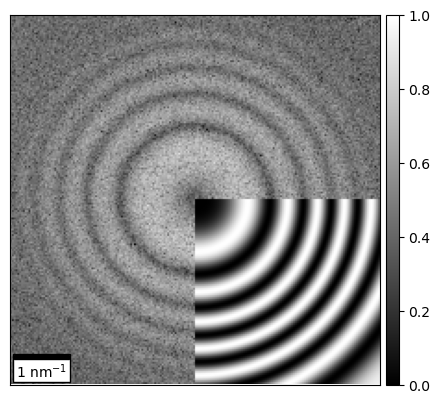

In [29]:
fit2DCTF( CTF, 0.033686, defocus=-226, fit_defocus=True, defocus_bounds=[-230,-220], fit_C2=False, fit_Cs=False )

In [38]:
CTF = importImageFromFile( 'LaB6_CTF.tif' )

Cs: 1.6 mm
Defocus: -1476.7482444415616 nm
C12a: 425.0 nm
C12b: 425.0 nm


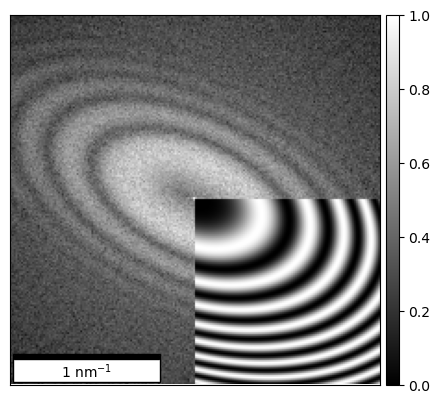

In [49]:
fit2DCTF( CTF, 0.0127888, defocus=-1500, fit_defocus=True, #defocus_bounds=[-1510,-1400],
           fit_C21=False, C21a=425, C21b=425 )